In [176]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read and open file 
df_9 = pd.read_csv("employfund_data_datesplit.zip", compression="zip", header=0, na_filter=False)
df_9.head()

In [16]:
# Unique values in UE group
print(df_9.UE_GROUP.unique())
print(df_9.AGE_GROUP.unique())


['Under 12 Months' '24 to 59 Months' '60+ Months' '12 to 23 Months' 'NULL']
['50 to 54 years' '25 to 29 years' '30 to 39 years' 'Under 22 years'
 '22 to 24 years' '40 to 49 years' '55 to 59 years' '60+ years' 'NULL']


In [150]:
# Remove NULL figures from UE Group
df_10 = df_9.loc[(df_9["UE_GROUP"] != "NULL")]
df_10["UE_GROUP"].unique()

array(['Under 12 Months', '24 to 59 Months', '60+ Months',
       '12 to 23 Months'], dtype=object)

In [151]:
UE_analysis_df = df_10[["EXPENDITURE", "DERIVED_DATE_OF_SERVICE", "AGE_GROUP", "UE_GROUP", "YEAR", "MONTH"]]
UE_analysis_df

,EXPENDITURE,DERIVED_DATE_OF_SERVICE,AGE_GROUP,UE_GROUP,YEAR,MONTH
0,150.0,2016-01-04,50 to 54 years,Under 12 Months,2016,1
1,300.0,2015-12-21,50 to 54 years,Under 12 Months,2015,12
2,150.0,2016-01-11,50 to 54 years,Under 12 Months,2016,1
3,150.0,2016-02-08,50 to 54 years,Under 12 Months,2016,2
4,225.0,2016-02-18,25 to 29 years,24 to 59 Months,2016,2
...,...,...,...,...,...,...
1234400,125.4,2016-11-29,55 to 59 years,Under 12 Months,2016,11
1234401,125.4,2016-11-15,55 to 59 years,Under 12 Months,2016,11
1234402,125.4,2016-12-13,55 to 59 years,Under 12 Months,2016,12
1234403,44.9,2015-10-29,30 to 39 years,12 to 23 Months,2015,10


In [152]:
UE_analysis_df.UE_GROUP.unique()

array(['Under 12 Months', '24 to 59 Months', '60+ Months',
       '12 to 23 Months'], dtype=object)

In [153]:
# Stratify by age group
UE_analysis_df_u22 = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "Under 22 years")]
UE_analysis_df_22_24 = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "22 to 24 years")]
UE_analysis_df_25_29 = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "25 to 29 years")]
UE_analysis_df_30_39 = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "30 to 29 years")]
UE_analysis_df_40_49 = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "40 to 49 years")]
UE_analysis_df_50_54 = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "50 to 54 years")]
UE_analysis_df_55_59 = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "55 to 59 years")]
UE_analysis_df_60_ = UE_analysis_df.loc[(UE_analysis_df["AGE_GROUP"] == "60+ years")]

In [154]:
UE_analysis_df_25_29

,EXPENDITURE,DERIVED_DATE_OF_SERVICE,AGE_GROUP,UE_GROUP,YEAR,MONTH
4,225.0,2016-02-18,25 to 29 years,24 to 59 Months,2016,2
5,300.0,2016-02-26,25 to 29 years,24 to 59 Months,2016,2
6,225.0,2016-02-18,25 to 29 years,24 to 59 Months,2016,2
7,300.0,2016-03-01,25 to 29 years,24 to 59 Months,2016,3
8,150.0,2016-08-30,25 to 29 years,24 to 59 Months,2016,8
...,...,...,...,...,...,...
1234296,151.0,2016-10-17,25 to 29 years,24 to 59 Months,2016,10
1234348,53.5,2016-09-29,25 to 29 years,60+ Months,2016,9
1234349,1650.0,2017-05-22,25 to 29 years,60+ Months,2017,5
1234350,30.4,2017-02-17,25 to 29 years,60+ Months,2017,2


In [219]:
# Groupby AGE cohorts, sum expenditure, convert back to DF, rename column

age_analysis_15 = UE_analysis_df.loc[(UE_analysis_df["YEAR"] == 2015)]
agegroup_df15 = age_analysis_15.groupby("AGE_GROUP")["EXPENDITURE"].sum()
agegroup_15 = agegroup_df15.to_frame()
agegroup15 = agegroup_15.rename(columns={"EXPENDITURE": "2015"})
agegroup15

age_analysis_16 = UE_analysis_df.loc[(UE_analysis_df["YEAR"] == 2016)]
agegroup_df16 = age_analysis_16.groupby("AGE_GROUP")["EXPENDITURE"].sum()
agegroup_16 = agegroup_df16.to_frame()
agegroup16 = agegroup_16.rename(columns={"EXPENDITURE": "2016"})
agegroup16

age_analysis_17 = UE_analysis_df.loc[(UE_analysis_df["YEAR"] == 2017)]
agegroup_df17 = age_analysis_17.groupby("AGE_GROUP")["EXPENDITURE"].sum()
agegroup_17 = agegroup_df17.to_frame()
agegroup17 = agegroup_17.rename(columns={"EXPENDITURE": "2017"})
agegroup_17

# Merge dataframes in prep for plot
age_plot1516 = pd.merge(agegroup15, agegroup16, on="AGE_GROUP")
age_plot = pd.merge(age_plot1516, agegroup17, on="AGE_GROUP")
age_plot

age_plot1 = age_plot.loc[['Under 22 years', '22 to 24 years', '25 to 29 years', '30 to 39 years', '40 to 49 years',
          '50 to 54 years', '55 to 59 years', '60+ years'], :]
age_plot1

,2015,2016,2017
AGE_GROUP,,,
Under 22 years,4645259.90,19997427.95,11241241.13
22 to 24 years,2736896.21,12536421.99,7331182.13
25 to 29 years,3381514.49,15503352.39,9820264.80
30 to 39 years,5821662.85,27218781.06,16923600.29
40 to 49 years,5902459.00,26964781.01,16642302.69
50 to 54 years,2254239.06,10455685.32,6278702.57
55 to 59 years,1353466.37,6256845.35,3811391.64
60+ years,819871.15,3646574.14,2307276.46


In [220]:
year1 = age_plot1.keys()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Under 22 years'),
  Text(1, 0, '22 to 24 years'),
  Text(2, 0, '25 to 29 years'),
  Text(3, 0, '30 to 39 years'),
  Text(4, 0, '40 to 49 years'),
  Text(5, 0, '50 to 54 years'),
  Text(6, 0, '55 to 59 years'),
  Text(7, 0, '60+ years')])

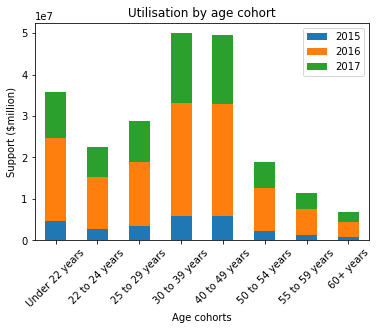

In [224]:
age_plot1.plot(kind='bar', stacked=True)
plt.title("Utilisation by age cohort")
plt.xlabel("Age cohorts")
plt.ylabel("Support ($million)")
# labels = ['< 22 yrs','22-24 yrs', '25-29 yrs', '30-39 yrs', '40-49 yrs', '50-54 yrs', '55-59 yrs', '60+ yrs']
plt.xticks(rotation=45)


In [155]:
# Filter data in year categories, then groupby UE Group and sum expenditure
# 2015 data
UE15_analysis_df = UE_analysis_df.loc[(UE_analysis_df["YEAR"] == 2015)]
grpUE15_analysis = UE15_analysis_df.groupby("UE_GROUP")["EXPENDITURE"].sum()
grpUE15_analysis_df = grpUE15_analysis.to_frame()
grpUE15_analysis_df = grpUE15_analysis_df.rename(columns={"EXPENDITURE": "2015"})

# 2016 data
UE16_analysis_df = UE_analysis_df.loc[(UE_analysis_df["YEAR"] == 2016)]
grpUE16_analysis = UE16_analysis_df.groupby("UE_GROUP")["EXPENDITURE"].sum()
grpUE16_analysis_df = grpUE16_analysis.to_frame()
grpUE16_analysis_df = grpUE16_analysis_df.rename(columns={"EXPENDITURE": "2016"})
grpUE16_analysis_df

# 2017 data
UE17_analysis_df = UE_analysis_df.loc[(UE_analysis_df["YEAR"] == 2017)]
grpUE17_analysis = UE17_analysis_df.groupby("UE_GROUP")["EXPENDITURE"].sum()
grpUE17_analysis_df = grpUE17_analysis.to_frame()
grpUE17_analysis_df = grpUE17_analysis_df.rename(columns={"EXPENDITURE": "2017"})
grpUE17_analysis_df.head()


# grpUE17_analysis_df = UE17_analysis_df.groupby("UE_Group")["AGE_GROUP"].agg({"EXPENDITURE": ['sum']})

# Merge dataframes in prep for plotting
UE_plot1516 = pd.merge(grpUE15_analysis_df, grpUE16_analysis_df, on="UE_GROUP")
UE_plot = pd.merge(UE_plot1516, grpUE17_analysis_df, on="UE_GROUP")
UE_plot


,2015,2016,2017
UE_GROUP,,,
12 to 23 Months,6100326.61,24982412.90,15854517.83
24 to 59 Months,8819225.62,38933044.32,23432694.12
60+ Months,4728627.80,22059553.96,14248127.84
Under 12 Months,7267189.00,36604858.03,20820621.92


In [174]:
years = UE_plot.keys()
years

Index(['2015', '2016', '2017'], dtype='object')

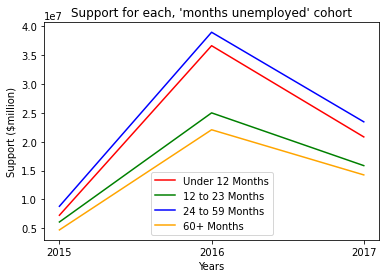

<Figure size 648x864 with 0 Axes>

In [200]:
# Plot data into line chart with multiple lines
UE_u12, = plt.plot(years, UE_plot.loc["Under 12 Months",["2015","2016","2017"]],
                    color="red",label="Under 12 Months")
UE_12_23, = plt.plot(years, UE_plot.loc["12 to 23 Months",["2015","2016","2017"]],
                    color="green",label="12 to 23 Months")
UE_24_59, = plt.plot(years, UE_plot.loc["24 to 59 Months",["2015","2016","2017"]],
                    color="blue",label="24 to 59 Months")
UE_60up, = plt.plot(years, UE_plot.loc["60+ Months",["2015","2016","2017"]],
                    color="orange",label="60+ Months")


# Legend
plt.legend(handles=[UE_u12, UE_12_23, UE_24_59, UE_60up], loc= "best")


# Title, x y axis labels, 
plt.title("Support for each, 'months unemployed' cohort")
plt.xlabel("Years")
plt.ylabel("Support ($million)")
plt.figure(figsize=(9,12))
plt.show()